In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [63]:
df_whole = pd.read_csv('../../PrimaryDataset/firefox_preproccessed_whole_dataset.csv')
df_sim = pd.read_csv('../../PreProcessedData/Firefox/Firefox_final_sim.csv')
df_dissim = pd.read_csv('../../PreProcessedData/Firefox/Firefox_final_dis.csv')

print('Dimensions of Whole Dataset: ', df_whole.shape)
print('Dimensions of Textually Similar Dataset: ', df_sim.shape)
print('Dimensions of Textually Dissimilar Dataset: ', df_dissim.shape)

Dimensions of Whole Dataset:  (38290, 11)
Dimensions of Textually Similar Dataset:  (1239, 14)
Dimensions of Textually Dissimilar Dataset:  (1589, 14)


# Statistics of Datasets

In [64]:
#To Describe Length of 'Description' of the Bugs
df_desc = pd.DataFrame()
df_desc['Whole'] = df_whole[['Description']].apply(lambda col: col.str.len().describe())
df_desc['Textually Similar'] = df_sim[['Description']].apply(lambda col: col.str.len().describe())
df_desc['Textually Disimilar'] = df_dissim[['Description']].apply(lambda col: col.str.len().describe())

#To show results
df_desc

,Whole,Textually Similar,Textually Disimilar
count,38290.000000,1239.000000,1589.000000
mean,1030.013581,815.469734,937.617999
std,2668.724674,461.516880,3267.957797
min,2.000000,66.000000,6.000000
25%,245.000000,508.000000,130.000000
50%,441.000000,713.000000,231.000000
75%,768.000000,994.000000,428.000000
max,57288.000000,5246.000000,41680.000000


# Skewness and Kurt of Textually Similar/Dissimilar Dataset

In [65]:
df_dict = {'Dataset':[], 'Skewness':[], 'Kurt':[], 'Mean':[], 'Median':[], 'Standard Deviation':[]}
df_cos = pd.DataFrame(df_dict)

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];
skewness_sim = df_sim_cos.skew();
kurt_sim = df_sim_cos.kurt();
mean_sim = df_sim_cos.mean()
median_sim = df_sim_cos.median()
std_sim = df_sim_cos.std()

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];
skewness_dissim = df_dissim_cos.skew();
kurt_dissim = df_dissim_cos.kurt();
mean_dissim = df_dissim_cos.mean()
median_dissim = df_dissim_cos.median()
std_dissim = df_dissim_cos.std()

df_cos.loc[len(df_cos.index)] = ['Textually Similar', round(skewness_sim,2), round(kurt_sim,2), 
                                 round(mean_sim,2), round(median_sim,2), round(std_sim,2)]
df_cos.loc[len(df_cos.index)] = ['Textually Dissimilar', round(skewness_dissim,2), round(kurt_dissim,2), 
                                 round(mean_dissim,2), round(median_dissim,2), round(std_dissim,2)]

#To show results
df_cos

,Dataset,Skewness,Kurt,Mean,Median,Standard Deviation
0,Textually Similar,0.88,0.46,0.09,0.09,0.01
1,Textually Dissimilar,-0.54,-0.49,0.03,0.03,0.01


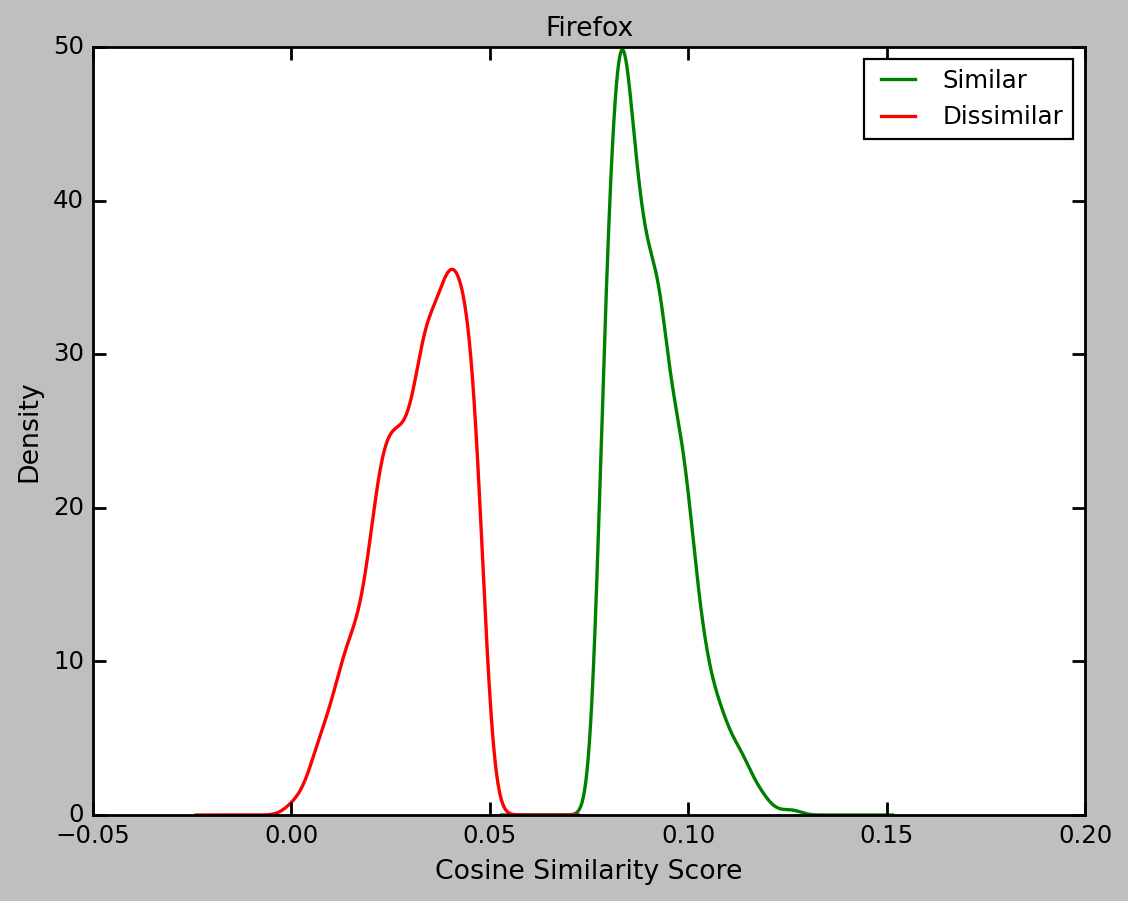

In [66]:
#To Plot Graph
ax = plt.axes()
x = df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y = df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Firefox')

plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()

# Cosine Similarity Score Difference

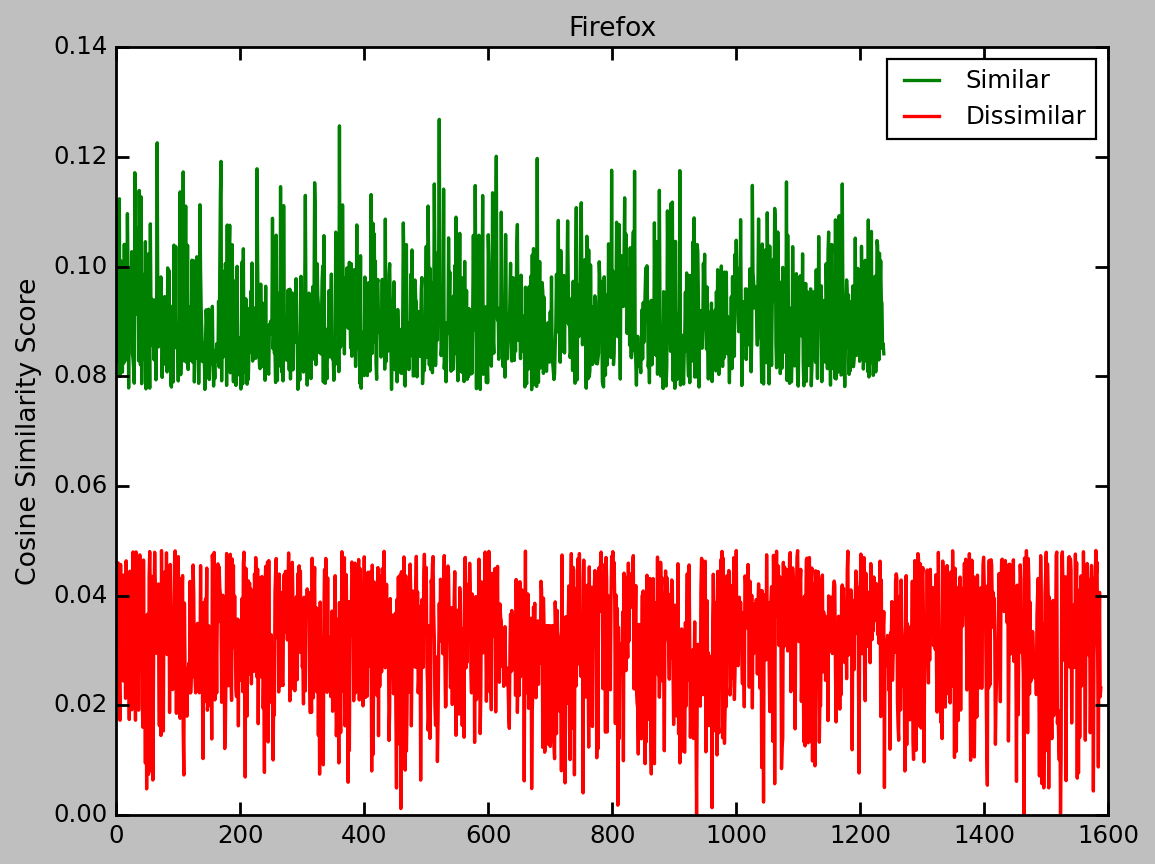

In [67]:
df_sim["Average_Cos_Similarity_Score"].plot(color='green')
df_dissim["Average_Cos_Similarity_Score"].plot(color='red')

plt.ylabel('Cosine Similarity Score')
plt.title('Firefox')

plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()